In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#load and prepare the dataset
# Load the dataset
df = pd.read_csv('/content/Salary_dataset.csv')
df

# Extract features (X) and target (y)
X = df[['YearsExperience']].values
y = df['Salary'].values

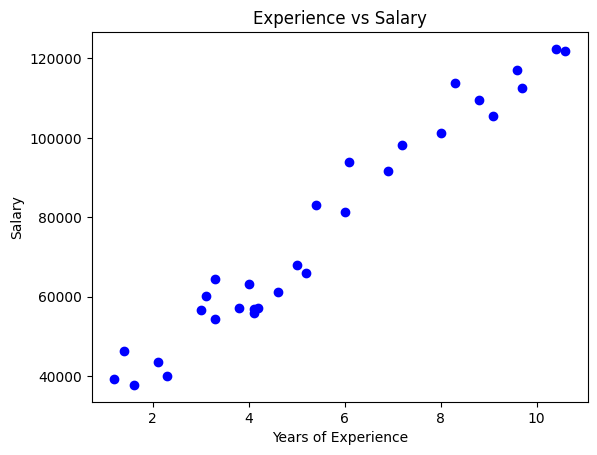

In [4]:
#Visualise the data
plt.scatter(X, y, color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

In [5]:
# define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [6]:
#add bias term
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
theta_initial = np.random.randn(2)  # random initialization

In [7]:
#gradient descent to minimize cost
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Run Gradient Descent
theta_optimal, cost_history = gradient_descent(X_b, y, theta_initial)

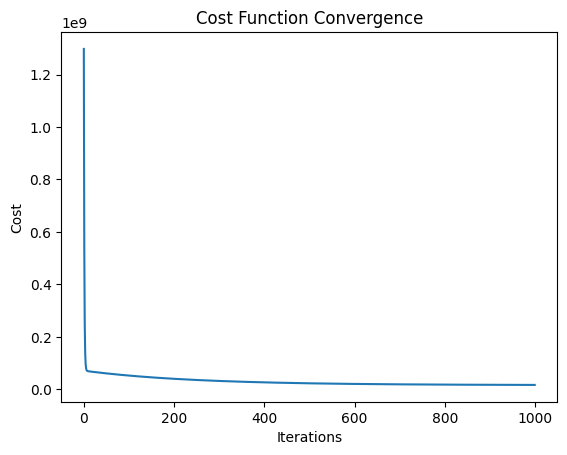

In [8]:
#plot cost history
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

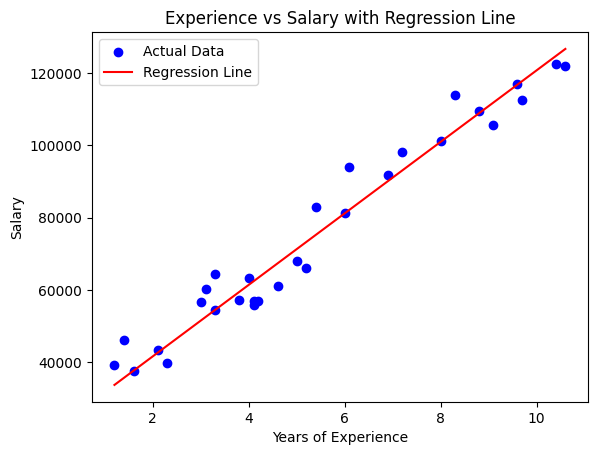

In [9]:
# pedict and visualise the regression model
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, X_b.dot(theta_optimal), color='red', label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary with Regression Line")
plt.legend()
plt.show()

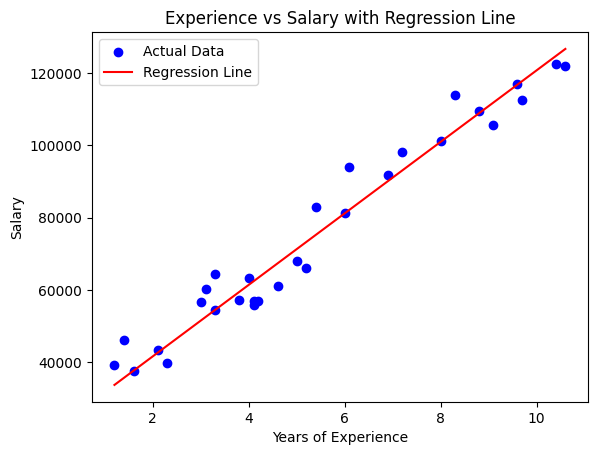

Final Parameters (Theta): [21912.71026084  9880.79623454]
Final Cost: 16539960.763087641


In [10]:
#print final parameters and cost
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, X_b.dot(theta_optimal), color='red', label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary with Regression Line")
plt.legend()
plt.show()
print("Final Parameters (Theta):", theta_optimal)
print("Final Cost:", cost_history[-1])
